In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#dataset = pd.read_csv('drive/My Drive/BCML/housing.csv')

In [ ]:
dataset.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**CRIM** per capita crime rate by town

**ZN** proportion of residential land zoned for lots over 25,000 sq.ft.

**INDUS** proportion of non-retail business acres per town

**CHAS** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

**NOX** nitric oxides concentration (parts per 10 million)

**RM** average number of rooms per dwelling

**AGE** proportion of owner-occupied units built prior to 1940

**DIS** weighted distances to five Boston employment centres

**RAD** index of accessibility to radial highways

**TAX** full-value property-tax rate per 10,000usd

**PTRATIO** pupil-teacher ratio by town

**B** 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

**LSTAT** % lower status of the population 

In [ ]:
dataset.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9a367d2080>,
      dtype=object)

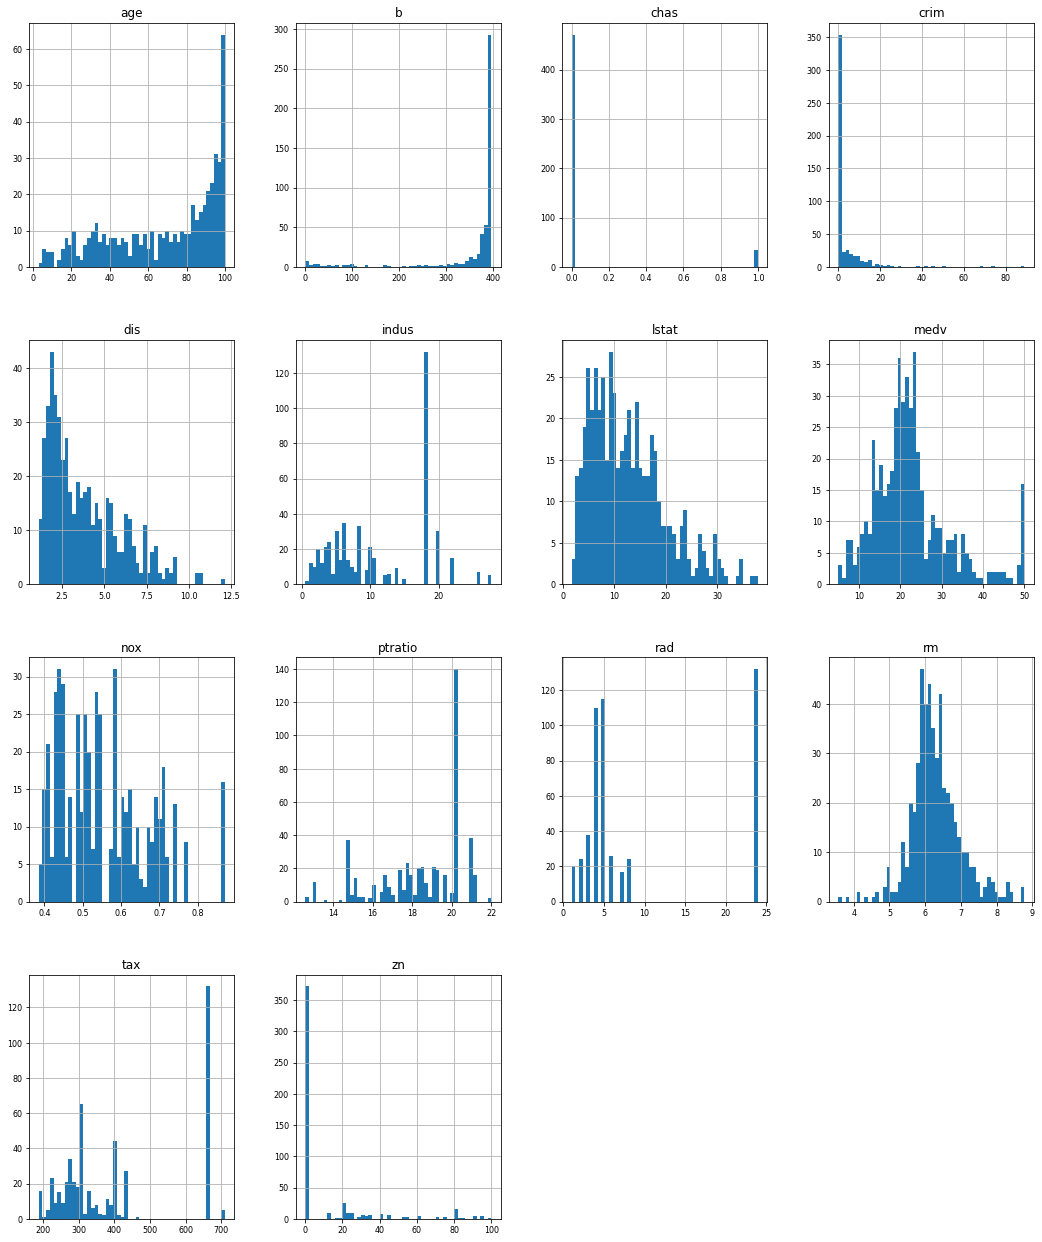

In [ ]:
dataset.hist(figsize=(18, 22), bins=50, xlabelsize=8, ylabelsize=8)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9a35c23a20>,
      dtype=object)

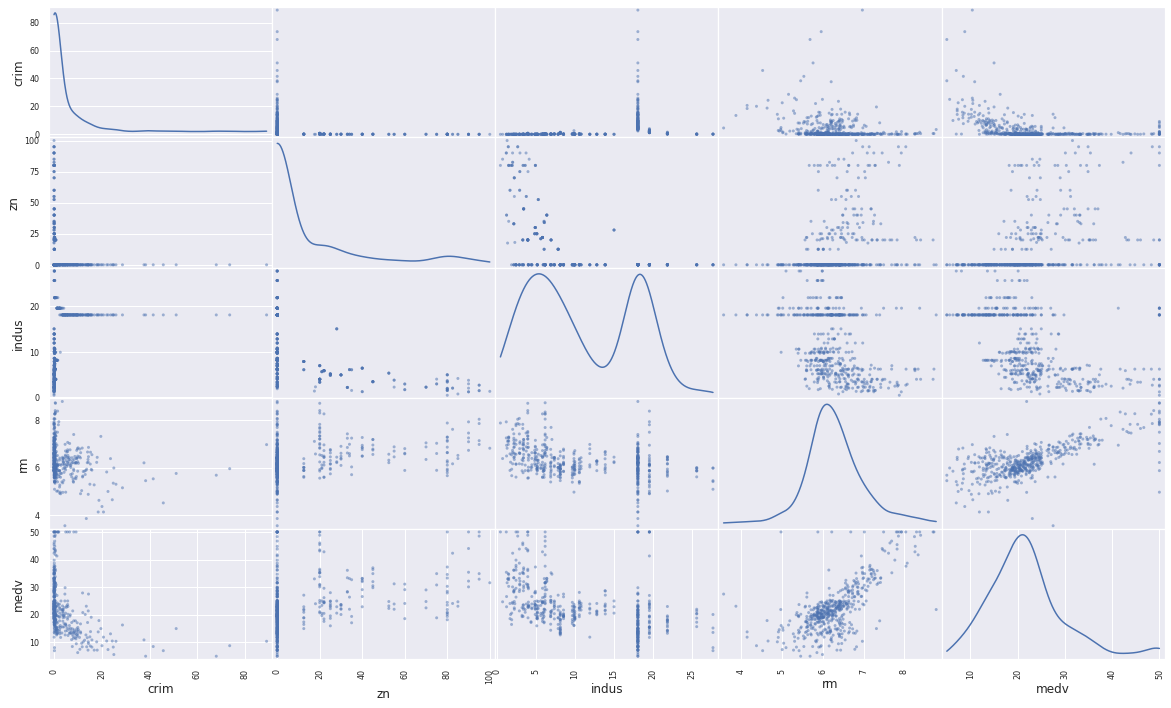

In [ ]:
sns.set()
feat = ['crim','zn','indus','rm', 'medv']
pd.plotting.scatter_matrix(dataset[feat], figsize=(20,12), diagonal='kde')

In [3]:
dataset.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [4]:
dataset.corr()['medv'][:-1]

crim      -0.388305
zn         0.360445
indus     -0.483725
chas       0.175260
nox       -0.427321
rm         0.695360
age       -0.376955
dis        0.249929
rad       -0.381626
tax       -0.468536
ptratio   -0.507787
b          0.333461
lstat     -0.737663
Name: medv, dtype: float64

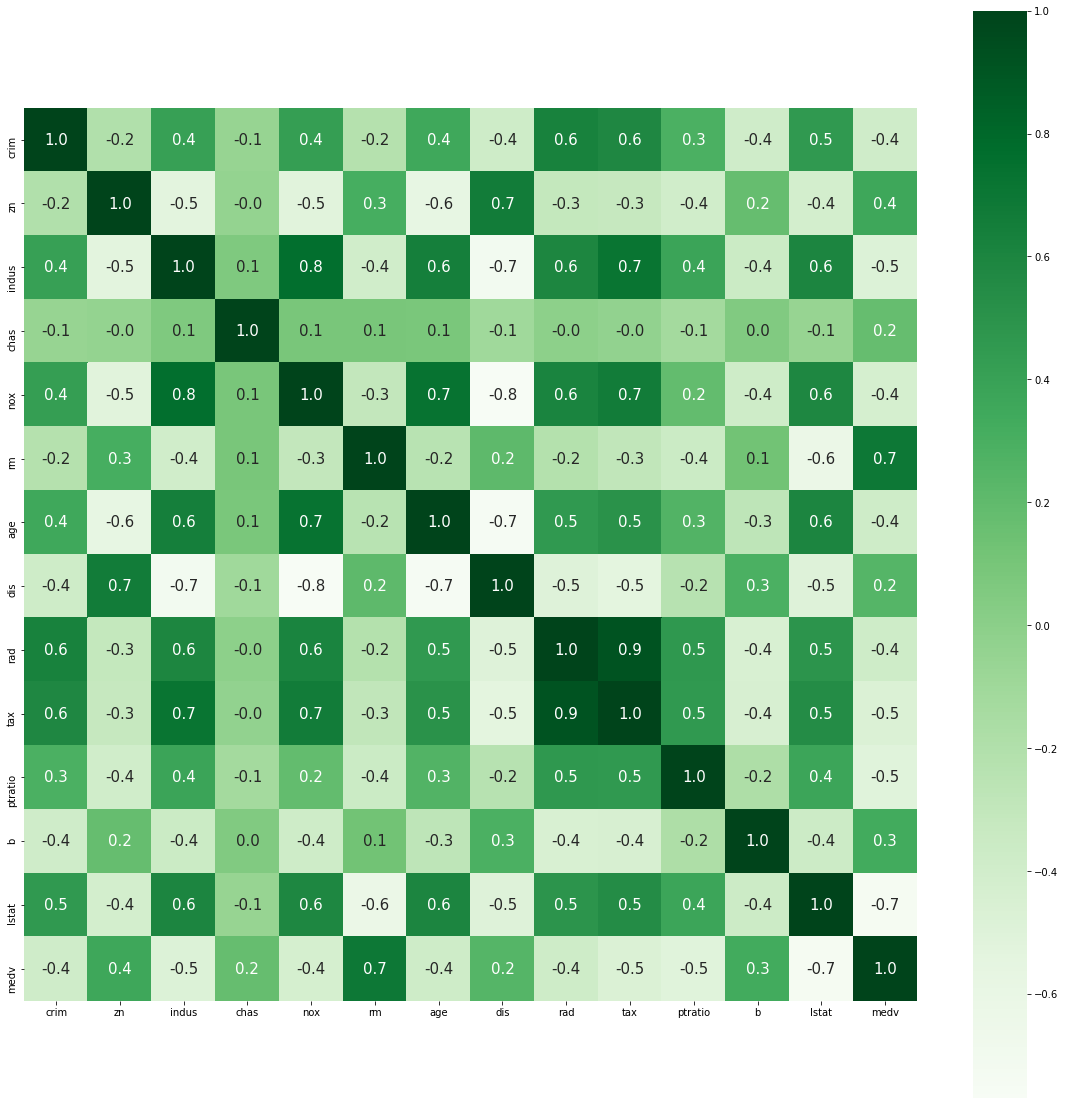

In [5]:
corr = dataset.corr()
# Heatmap untuk melihat korelasi
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [6]:
label = dataset['medv']
features = dataset.drop(['medv'], axis=1)

In [7]:
dataset.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PowerTransformer, QuantileTransformer, MinMaxScaler, MaxAbsScaler, RobustScaler

scalr = (preprocessing.StandardScaler(), preprocessing.PowerTransformer(method='yeo-johnson'), preprocessing.PowerTransformer(method='box-cox'), preprocessing.QuantileTransformer(), preprocessing.MinMaxScaler(), preprocessing.MaxAbsScaler(), preprocessing.RobustScaler())
for i in scalr:
  scaler = (i)

  feature_train, feature_test, label_train, label_test = train_test_split(features, label, test_size=0.25, random_state=10)

  lm = LinearRegression()
  lm.fit(feature_train, label_train)

  predictions = lm.predict(feature_test)
  mse = mean_squared_error(label_test, predictions)
  mae = mean_absolute_error(label_test, predictions)
  r2 = r2_score(label_test, predictions)
  print("Using " +str(i))
  print("MSE (Mean Squared Error)", mse)
  print("MAE (Mean Absolute Error)", mae)
  print("r^2 score", r2)
  print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))
  print("")

Using StandardScaler(copy=True, with_mean=True, with_std=True)
MSE (Mean Squared Error) 32.4425366960065
MAE (Mean Absolute Error) 3.857300907995504
r^2 score 0.6745585065949427
RMSE (Root Mean Squared Error 5.69583503061724

Using PowerTransformer(copy=True, method='yeo-johnson', standardize=True)
MSE (Mean Squared Error) 32.4425366960065
MAE (Mean Absolute Error) 3.857300907995504
r^2 score 0.6745585065949427
RMSE (Root Mean Squared Error 5.69583503061724

Using PowerTransformer(copy=True, method='box-cox', standardize=True)
MSE (Mean Squared Error) 32.4425366960065
MAE (Mean Absolute Error) 3.857300907995504
r^2 score 0.6745585065949427
RMSE (Root Mean Squared Error 5.69583503061724

Using QuantileTransformer(copy=True, ignore_implicit_zeros=False, n_quantiles=1000,
                    output_distribution='uniform', random_state=None,
                    subsample=100000)
MSE (Mean Squared Error) 32.4425366960065
MAE (Mean Absolute Error) 3.857300907995504
r^2 score 0.67455850659494

**Kesimpulan**

Berdasarkan penggunaan preprocessing yang berbeda-beda dan menggunakan algoritma Linear Regression diatas tidak mempengaruhi R2 Score, MSE, MAE dan RMSE

In [9]:
# Random Forest
scalr = (preprocessing.StandardScaler(), preprocessing.PowerTransformer(method='yeo-johnson'), preprocessing.PowerTransformer(method='box-cox'), preprocessing.QuantileTransformer(), preprocessing.MinMaxScaler(), preprocessing.MaxAbsScaler(), preprocessing.RobustScaler())
for i in scalr:
  scaler = (i)

  feature_train, feature_test, label_train, label_test = train_test_split(features, label, test_size=0.25, random_state=10)

  from sklearn.ensemble import RandomForestRegressor
  lm = RandomForestRegressor()
  lm.fit(feature_train, label_train)

  predictions = lm.predict(feature_test)
  mse = mean_squared_error(label_test, predictions)
  mae = mean_absolute_error(label_test, predictions)
  r2 = r2_score(label_test, predictions)
  print("Using " +str(i))
  print("MSE (Mean Squared Error)", mse)
  print("MAE (Mean Absolute Error)", mae)
  print("r^2 score", r2)
  print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))
  print("")

Using StandardScaler(copy=True, with_mean=True, with_std=True)
MSE (Mean Squared Error) 14.064259314960617
MAE (Mean Absolute Error) 2.6038346456692905
r^2 score 0.858916902892486
RMSE (Root Mean Squared Error 3.7502345679917966

Using PowerTransformer(copy=True, method='yeo-johnson', standardize=True)
MSE (Mean Squared Error) 13.596234314960622
MAE (Mean Absolute Error) 2.6203937007874014
r^2 score 0.863611811813392
RMSE (Root Mean Squared Error 3.6873071902081365

Using PowerTransformer(copy=True, method='box-cox', standardize=True)
MSE (Mean Squared Error) 13.323554370078737
MAE (Mean Absolute Error) 2.5664173228346443
r^2 score 0.8663471518182595
RMSE (Root Mean Squared Error 3.6501444313997684

Using QuantileTransformer(copy=True, ignore_implicit_zeros=False, n_quantiles=1000,
                    output_distribution='uniform', random_state=None,
                    subsample=100000)
MSE (Mean Squared Error) 14.08724675590551
MAE (Mean Absolute Error) 2.628976377952756
r^2 score 0.

In [10]:
# XGBoost

scalr = (preprocessing.StandardScaler(), preprocessing.PowerTransformer(method='yeo-johnson'), preprocessing.PowerTransformer(method='box-cox'), preprocessing.QuantileTransformer(), preprocessing.MinMaxScaler(), preprocessing.MaxAbsScaler(), preprocessing.RobustScaler())
for i in scalr:
  scaler = (i)

  feature_train, feature_test, label_train, label_test = train_test_split(features, label, test_size=0.25, random_state=10)

  import xgboost as xgb
  lm = xgb.XGBRegressor(learning_rate=0.22)
  lm.fit(feature_train, label_train)

  predictions = lm.predict(feature_test)
  mse = mean_squared_error(label_test, predictions)
  mae = mean_absolute_error(label_test, predictions)
  r2 = r2_score(label_test, predictions)
  print("Using " +str(i))
  print("MSE (Mean Squared Error)", mse)
  print("MAE (Mean Absolute Error)", mae)
  print("r^2 score", r2)
  print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))
  print("")

[01:54:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Using StandardScaler(copy=True, with_mean=True, with_std=True)
MSE (Mean Squared Error) 9.81288067436452
MAE (Mean Absolute Error) 2.2483974764666224
r^2 score 0.9015638459102392
RMSE (Root Mean Squared Error 3.132551783189628

[01:54:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Using PowerTransformer(copy=True, method='yeo-johnson', standardize=True)
MSE (Mean Squared Error) 9.81288067436452
MAE (Mean Absolute Error) 2.2483974764666224
r^2 score 0.9015638459102392
RMSE (Root Mean Squared Error 3.132551783189628

[01:54:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Using PowerTransformer(copy=True, method='box-cox', standardize=True)
MSE (Mean Squared Error) 9.81288067436452
MAE (Mean Absolute Error) 2.248397476466

In [11]:
# SVM Regressor

scalr = (preprocessing.StandardScaler(), preprocessing.PowerTransformer(method='yeo-johnson'), preprocessing.PowerTransformer(method='box-cox'), preprocessing.QuantileTransformer(), preprocessing.MinMaxScaler(), preprocessing.MaxAbsScaler(), preprocessing.RobustScaler())
for i in scalr:
  scaler = (i)

  feature_train, feature_test, label_train, label_test = train_test_split(features, label, test_size=0.25, random_state=10)

  from sklearn.svm import SVR
  svkernel = ("rbf", "linear", "poly")
  for j in svkernel:
    lm = SVR()
    lm.fit(feature_train, label_train)

    predictions = lm.predict(feature_test)
    mse = mean_squared_error(label_test, predictions)
    mae = mean_absolute_error(label_test, predictions)
    r2 = r2_score(label_test, predictions)
    print("SVR Kernel : " +str(j))
    print("Using " +str(i))
    print("MSE (Mean Squared Error)", mse)
    print("MAE (Mean Absolute Error)", mae)
    print("r^2 score", r2)
    print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))
    print("")

SVR Kernel : rbf
Using StandardScaler(copy=True, with_mean=True, with_std=True)
MSE (Mean Squared Error) 97.81277668792198
MAE (Mean Absolute Error) 6.231153504938998
r^2 score 0.01880865797614728
RMSE (Root Mean Squared Error 9.890034210654782

SVR Kernel : linear
Using StandardScaler(copy=True, with_mean=True, with_std=True)
MSE (Mean Squared Error) 97.81277668792198
MAE (Mean Absolute Error) 6.231153504938998
r^2 score 0.01880865797614728
RMSE (Root Mean Squared Error 9.890034210654782

SVR Kernel : poly
Using StandardScaler(copy=True, with_mean=True, with_std=True)
MSE (Mean Squared Error) 97.81277668792198
MAE (Mean Absolute Error) 6.231153504938998
r^2 score 0.01880865797614728
RMSE (Root Mean Squared Error 9.890034210654782

SVR Kernel : rbf
Using PowerTransformer(copy=True, method='yeo-johnson', standardize=True)
MSE (Mean Squared Error) 97.81277668792198
MAE (Mean Absolute Error) 6.231153504938998
r^2 score 0.01880865797614728
RMSE (Root Mean Squared Error 9.890034210654782

S

In [12]:
# KNN Regressor

scalr = (preprocessing.StandardScaler(), preprocessing.PowerTransformer(method='yeo-johnson'), preprocessing.PowerTransformer(method='box-cox'), preprocessing.QuantileTransformer(), preprocessing.MinMaxScaler(), preprocessing.MaxAbsScaler(), preprocessing.RobustScaler())
for i in scalr:
  scaler = (i)

  feature_train, feature_test, label_train, label_test = train_test_split(features, label, test_size=0.25, random_state=10)

  from sklearn.neighbors import KNeighborsRegressor
  lm = KNeighborsRegressor()
  lm.fit(feature_train, label_train)

  predictions = lm.predict(feature_test)
  mse = mean_squared_error(label_test, predictions)
  mae = mean_absolute_error(label_test, predictions)
  r2 = r2_score(label_test, predictions)
  print("Using " +str(i))
  print("MSE (Mean Squared Error)", mse)
  print("MAE (Mean Absolute Error)", mae)
  print("r^2 score", r2)
  print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))
  print("")

Using StandardScaler(copy=True, with_mean=True, with_std=True)
MSE (Mean Squared Error) 59.09914330708662
MAE (Mean Absolute Error) 5.049763779527558
r^2 score 0.4071575340412489
RMSE (Root Mean Squared Error 7.687596718551684

Using PowerTransformer(copy=True, method='yeo-johnson', standardize=True)
MSE (Mean Squared Error) 59.09914330708662
MAE (Mean Absolute Error) 5.049763779527558
r^2 score 0.4071575340412489
RMSE (Root Mean Squared Error 7.687596718551684

Using PowerTransformer(copy=True, method='box-cox', standardize=True)
MSE (Mean Squared Error) 59.09914330708662
MAE (Mean Absolute Error) 5.049763779527558
r^2 score 0.4071575340412489
RMSE (Root Mean Squared Error 7.687596718551684

Using QuantileTransformer(copy=True, ignore_implicit_zeros=False, n_quantiles=1000,
                    output_distribution='uniform', random_state=None,
                    subsample=100000)
MSE (Mean Squared Error) 59.09914330708662
MAE (Mean Absolute Error) 5.049763779527558
r^2 score 0.4071575

**Kesimpulan**
R2 Score terbesar berada pada model XGBoost(learning_rate=0.22). Dimana:

Using StandardScaler(copy=True, with_mean=True, with_std=True)

MSE (Mean Squared Error) 9.81288067436452

MAE (Mean Absolute Error) 2.2483974764666224

r^2 score 0.9015638459102392

RMSE (Root Mean Squared Error 3.132551783189628
